# Long Format and Wide Format

General Rules of Thumb with Tabular Data:
- It is easier to describe functional relationships between **variables/columns** (e.g., z is a linear combination
  of x and y, density is the ratio of weight to volume) than between rows, and it is easier
  to make comparisons between groups of **observations/rows** (e.g., average of group a vs. average of
  group b) than between groups of columns.
- Depending on your use case, you might want to represent some information as individual rows of a single column (long format), or represent that same information across multiple, separate columns (wide format).
- Long Format is generally better for visualizing statistics (e.g. matplotlib seaborn), whereas Wide Format generally lends itself better for machine learning.
- You'll usually know in which format you want your data to look, so it becomes more an exercise of how to actually implement it.

In [119]:
import pandas as pd
import numpy as np

In [120]:
df = pd.read_csv('penguins_simple.csv',sep = ';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              333 non-null    object 
 1   Culmen Length (mm)   333 non-null    float64
 2   Culmen Depth (mm)    333 non-null    float64
 3   Flipper Length (mm)  333 non-null    float64
 4   Body Mass (g)        333 non-null    float64
 5   Sex                  333 non-null    object 
dtypes: float64(4), object(2)
memory usage: 15.7+ KB


In [121]:
g = df.groupby(['Sex','Species'])['Body Mass (g)'].mean() 
#order is important for unstacking. It chooses the inner most (-1) meaning the last one.  But I can change it
g

Sex     Species  
FEMALE  Adelie       3368.835616
        Chinstrap    3527.205882
        Gentoo       4679.741379
MALE    Adelie       4043.493151
        Chinstrap    3938.970588
        Gentoo       5484.836066
Name: Body Mass (g), dtype: float64

In [122]:
wide = g.unstack() 
wide

Species,Adelie,Chinstrap,Gentoo
Sex,,,
FEMALE,3368.835616,3527.205882,4679.741379
MALE,4043.493151,3938.970588,5484.836066


In [123]:
wide = g.unstack(0) # unstack from first value not inner value which is the default (-1)
wide

Sex,FEMALE,MALE
Species,,
Adelie,3368.835616,4043.493151
Chinstrap,3527.205882,3938.970588
Gentoo,4679.741379,5484.836066


In [124]:
df['Region'] = ['Region_A']*100+['Region_B']*100+['Region_C']*133
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Region
0,Adelie,39.1,18.7,181.0,3750.0,MALE,Region_A
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE,Region_A
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE,Region_A
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE,Region_A
4,Adelie,39.3,20.6,190.0,3650.0,MALE,Region_A


In [125]:
df.value_counts()

Species  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  Sex     Region  
Adelie   32.1                15.5               188.0                3050.0         FEMALE  Region_B    1
Gentoo   44.0                13.6               208.0                4350.0         FEMALE  Region_C    1
         43.6                13.9               217.0                4900.0         FEMALE  Region_C    1
         43.5                15.2               213.0                4650.0         FEMALE  Region_C    1
                             14.2               220.0                4700.0         FEMALE  Region_C    1
                                                                                                       ..
Adelie   40.8                18.9               208.0                4300.0         MALE    Region_A    1
                             18.4               195.0                3900.0         MALE    Region_A    1
         40.7                17.0               190

In [126]:
df['Region'].value_counts()

Region_C    133
Region_A    100
Region_B    100
Name: Region, dtype: int64

In [127]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Region
0,Adelie,39.1,18.7,181.0,3750.0,MALE,Region_A
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE,Region_A
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE,Region_A
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE,Region_A
4,Adelie,39.3,20.6,190.0,3650.0,MALE,Region_A


In [128]:

g2 = df.groupby(['Sex','Species','Region'])['Body Mass (g)'].mean() #
g2

Sex     Species    Region  
FEMALE  Adelie     Region_A    3379.000000
                   Region_B    3346.739130
        Chinstrap  Region_B    3530.555556
                   Region_C    3514.285714
        Gentoo     Region_C    4679.741379
MALE    Adelie     Region_A    4076.500000
                   Region_B    3971.739130
        Chinstrap  Region_B    3955.555556
                   Region_C    3875.000000
        Gentoo     Region_C    5484.836066
Name: Body Mass (g), dtype: float64

In [129]:
wide2 = g2.unstack((0,2))
wide2

Sex         FEMALE                               MALE               \
Region    Region_A     Region_B     Region_C Region_A     Region_B   
Species                                                              
Adelie      3379.0  3346.739130          NaN   4076.5  3971.739130   
Chinstrap      NaN  3530.555556  3514.285714      NaN  3955.555556   
Gentoo         NaN          NaN  4679.741379      NaN          NaN   

Sex                     
Region        Region_C  
Species                 
Adelie             NaN  
Chinstrap  3875.000000  
Gentoo     5484.836066

<AxesSubplot:xlabel='Species'>

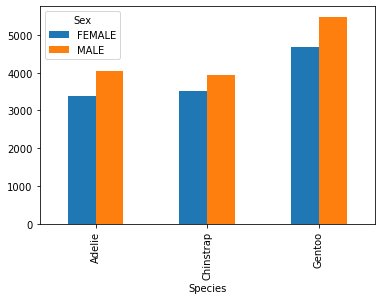

In [130]:
wide.plot.bar()

<AxesSubplot:xlabel='Species'>

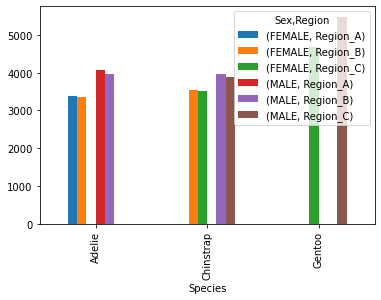

In [131]:
wide2.plot.bar()

In [132]:
long = wide.stack()
long

Species    Sex   
Adelie     FEMALE    3368.835616
           MALE      4043.493151
Chinstrap  FEMALE    3527.205882
           MALE      3938.970588
Gentoo     FEMALE    4679.741379
           MALE      5484.836066
dtype: float64

In [133]:
long2 = wide2.stack(1) #Undo the unstack
long2

Sex                      FEMALE         MALE
Species   Region                            
Adelie    Region_A  3379.000000  4076.500000
          Region_B  3346.739130  3971.739130
Chinstrap Region_B  3530.555556  3955.555556
          Region_C  3514.285714  3875.000000
Gentoo    Region_C  4679.741379  5484.836066

In [134]:
long2.stack(0)

Species    Region    Sex   
Adelie     Region_A  FEMALE    3379.000000
                     MALE      4076.500000
           Region_B  FEMALE    3346.739130
                     MALE      3971.739130
Chinstrap  Region_B  FEMALE    3530.555556
                     MALE      3955.555556
           Region_C  FEMALE    3514.285714
                     MALE      3875.000000
Gentoo     Region_C  FEMALE    4679.741379
                     MALE      5484.836066
dtype: float64

In [135]:
wide.reset_index()

Sex,Species,FEMALE,MALE
0,Adelie,3368.835616,4043.493151
1,Chinstrap,3527.205882,3938.970588
2,Gentoo,4679.741379,5484.836066


Common patters in data science:
- ``empty list`` + ``for-loop`` + ``.append()``
- ``.groupby(['col1', 'col2', ...])``  + ``.unstack()``
- ``.set_index()`` + ``.stack()``

---

Example taken from **Tidy Data (Journal of Statistical Software)** (see course material)

In [138]:
data = [['John Smith', np.nan, 2], ['Jane Doe', 16.0, 11.0], ['Mary Johnson', 3.0, 1.0]]
columns=['person', 'treatment_a', 'treatment_b']
untidy = pd.DataFrame(columns=columns, data=data)

In [139]:
untidy

,person,treatment_a,treatment_b
0,John Smith,NaN,2.0
1,Jane Doe,16.0,11.0
2,Mary Johnson,3.0,1.0


In [148]:
untidy.set_index('person').stack(dropna = False).reset_index()

,person,level_1,0
0,John Smith,treatment_a,NaN
1,John Smith,treatment_b,2.0
2,Jane Doe,treatment_a,16.0
3,Jane Doe,treatment_b,11.0
4,Mary Johnson,treatment_a,3.0
5,Mary Johnson,treatment_b,1.0


In [150]:
tidy = pd.melt(untidy, id_vars= 'person', var_name='treatment_type',value_name='result')
tidy

,person,treatment_type,result
0,John Smith,treatment_a,NaN
1,Jane Doe,treatment_a,16.0
2,Mary Johnson,treatment_a,3.0
3,John Smith,treatment_b,2.0
4,Jane Doe,treatment_b,11.0
5,Mary Johnson,treatment_b,1.0


In summary, we have 2 configurations of tables:
- Long Format:
    - to get a table into long format, use:
        - ``stack`` or ``melt``
    - In general, lends itself better for plotting statistics
- Wide Format:
    - to get a table into wide format, use:
        - ``unstack`` or ``pivot``
    - In general, lends itself better for machine learning
    
Also:

"Tidy data is particularly well suited for programming languages like R and Python, because the layout **ensures that values of different variables from the same observation are always paired.**" -Hadley Wickham, *Tidy Data*

---

More practical example of "untidy" data in a very wide format:
- Your job is to melt this data into a longer format so that it's easier to work with and merge with other tables in the Animated Scatterplot Exercise in the course material. https://krspiced.pythonanywhere.com/chapters/project_gapminder/long_vs_wide.html#animated-scatterplot-exercise

In [145]:
pd.read_excel('gapminder_population.xlsx').head()

,Total population,1800.0,1810.0,1820.0,1830.0,1840.0,1850.0,1860.0,1870.0,1880.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
4,Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0
